Niall Carbery 22380966. When asked for the expectation value we are concerned with measurement outcomes, and
not building an evolution operator out of the Hamiltonian. Keep this in mind throughout
the project.

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt 
import matplotlib.ticker as tck
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
zero = np.array([[1], [0]])

X_gate = np.array([[0 ,1], [1, 0]])
Y_gate = np.array([[0 ,-1j], [1j, 0]])
Z_gate = np.array([[1 ,0], [0, -1]])
I_gate = np.array([[1 ,0], [0, 1]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])
S_gate = np.array([[1 ,0], [0, 1j]])

swap_gate = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])
cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])

cnot_gate13 = np.kron(I_gate, swap_gate)@np.kron(cnot_gate, I_gate)@np.kron(I_gate, swap_gate)
triple_H  = np.kron(np.kron(H_gate, H_gate), H_gate)

def dagger(state):
    return np.transpose(np.conj(state))

## Question 2

###
<b>How can we now calculate the expecation for a Hamiltonian with Pauli matrices other than Z? For
example, consider the following 3 qubit hamiltonian: $\hat H_c = X_0 \otimes Y_1 \otimes Z_2$</b>

In [3]:
# Define the Pauli Matrices

def dagger(state):
    return np.transpose(np.conj(state))

pauli_I = np.array([[1,0],[0,1]])
pauli_X = np.array([[0,1],[1,0]])
pauli_Y = np.array([[0,-1j],[1j,0]])
pauli_Z = np.array([[1,0],[0,-1]])

pauli_matrices = [pauli_I, pauli_X, pauli_Y, pauli_Z]

hadamard = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
s_phase  = np.array([[1,0],[0,1j]])

Since we can only measure in the Z- basis, we need to express the Hamiltonian in terms of the Z-basis states. Where the operaters are repersented as 
- X operator: $X = HZH$
- Y operator: $Y = SHZHS^*$



## Question 3

In [4]:
def three(a, b, c):
    return np.kron(np.kron(a, b), c)

cnot_gate13 = np.kron(pauli_I, swap_gate)@np.kron(cnot_gate, pauli_I)@np.kron(pauli_I, swap_gate)
transform = cnot_gate13@np.kron(cnot_gate, pauli_I)@three(H_gate, H_gate, H_gate)

X0X1X2 = three(pauli_X, pauli_X, pauli_X)

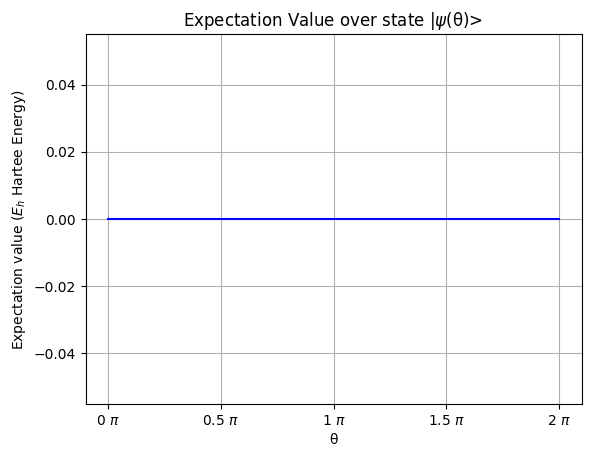

In [5]:
def find_pauli_coeffs_3qubit(ham):
    ham_pauli_coeffs = {}
    for indexA, current_pauli_A in enumerate(pauli_matrices):
        for indexB, current_pauli_B in enumerate(pauli_matrices):
            for indexC, current_pauli_C in enumerate(pauli_matrices):
                current_pauli_string = np.kron(np.kron(current_pauli_A, current_pauli_B), current_pauli_C)
                current_ham_projection = np.real((1/2**3) * np.trace(ham @ current_pauli_string))
                if current_ham_projection != 0.0:
                    ham_pauli_coeffs.update({f"{indexA}{indexB}{indexC}": current_ham_projection})
    return ham_pauli_coeffs

def basis_transform_3qubit(pauli_string):
    system_A_pauli = int(pauli_string[0])
    system_B_pauli = int(pauli_string[1])
    system_C_pauli = int(pauli_string[2])
    
    system_A_transform = None
    system_B_transform = None
    system_C_transform = None
    
    if system_A_pauli == 0:
        system_A_transform = pauli_I
    elif system_A_pauli == 1:
        system_A_transform = hadamard
    elif system_A_pauli == 2:
        system_A_transform = hadamard @ dagger(s_phase)
    elif system_A_pauli == 3:
        system_A_transform = pauli_I
    
    if system_B_pauli == 0:
        system_B_transform = pauli_I
    elif system_B_pauli == 1:
        system_B_transform = hadamard
    elif system_B_pauli == 2:
        system_B_transform = hadamard @ dagger(s_phase)
    elif system_B_pauli == 3:
        system_B_transform = pauli_I
    
    if system_C_pauli == 0:
        system_C_transform = pauli_I
    elif system_C_pauli == 1:
        system_C_transform = hadamard
    elif system_C_pauli == 2:
        system_C_transform = hadamard @ dagger(s_phase)
    elif system_C_pauli == 3:
        system_C_transform = pauli_I
    
    return np.kron(np.kron(system_A_transform, system_B_transform), system_C_transform)

def expectation_from_decomp_3qubit(ham_pauli_decomp, state):
    total_expectation = 0.0
    for current_key in ham_pauli_decomp.keys():
        current_transform = basis_transform_3qubit(current_key)
        transformed_state = current_transform @ state
        system_A_pauli = int(current_key[0])
        system_B_pauli = int(current_key[1])
        system_C_pauli = int(current_key[2])
        
        if system_A_pauli == 0:
            system_A_op = pauli_I
        else:
            system_A_op = pauli_Z
            
        if system_B_pauli == 0:
        
            system_B_op = pauli_I
        else:
            system_B_op = pauli_Z
            
        if system_C_pauli == 0:
            system_C_op = pauli_I
        else:
            system_C_op = pauli_Z
            
        total_expectation += ham_pauli_decomp[current_key] * dagger(transformed_state) @ np.kron(np.kron(system_A_op, system_B_op), system_C_op) @ transformed_state

    return total_expectation


hama = np.kron(np.kron(pauli_Z, pauli_Z), pauli_X)

ham_tot_pauli_decomp = find_pauli_coeffs_3qubit(hama)

np.set_printoptions(precision=3)
eigvals_tot, eigvecs_tot = scipy.linalg.eigh(hama)


ground_state_tot = eigvecs_tot[:,0]
expectation_from_decomp_3qubit(ham_tot_pauli_decomp, ground_state_tot)

def wavefunction(theta):
    return 1/(2*np.sqrt(2))*np.array([np.cos(theta), np.cos(theta), np.cos(theta), np.cos(theta), -np.sin(theta), -np.sin(theta), -np.sin(theta), -np.sin(theta)])

x = np.arange(0, 2*np.pi, 0.01)

y_values = []

for i in x:
    y_values.append(expectation_from_decomp_3qubit(ham_tot_pauli_decomp, wavefunction(i)).real)

plt.plot(x/np.pi, y_values, color='blue')

plt.xlabel('θ')
plt.ylabel('Expectation value ($E_h$ Hartee Energy)')
plt.title('Expectation Value over state $|\psi$(θ)> ')

plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

plt.grid()
plt.show()

In [6]:
initial_state = np.array([[np.sqrt(3)/2], [1/2]])

cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
cnot_gate13 = np.kron(pauli_I, swap_gate)@np.kron(cnot_gate, pauli_I)@np.kron(pauli_I, swap_gate)
triple_H  = np.kron(np.kron(H_gate, H_gate), H_gate)

psi_initial = np.kron(np.kron(zero, zero), zero)

psi_out = triple_H@cnot_gate13@np.kron(cnot_gate, pauli_I)@psi_initial

print('Psi Out > =  \n', psi_out)

rho = psi_out@dagger(psi_out)

print('Denisty Matrix of Output State: \n', rho)

Psi Out > =  
 [[0.354]
 [0.354]
 [0.354]
 [0.354]
 [0.354]
 [0.354]
 [0.354]
 [0.354]]
Denisty Matrix of Output State: 
 [[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
 [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]]


### Question 4

In [7]:
def four(a, b, c, d):
    return np.kron(np.kron(np.kron(a, b), c), d)

Eh = 27.211*1.609*10**(-19)
c1 = -0.138754
c2 = -0.152989
c3 = 0.164190
c4 = 0.144579
c5 = 0.111373
c6 = 0.146726
c7 = 0.169348
c8 = -0.035353
c9 = 0.035353

# Hydrogen Hamiltonian
hydrogen = ((c9*four(Y_gate,X_gate,X_gate,Y_gate))+(c9*four(X_gate,Y_gate,Y_gate,X_gate))+(c8*four(Y_gate,Y_gate,X_gate,X_gate))+ \
    (c8*four(X_gate,X_gate,Y_gate,Y_gate))+(c7*four(Z_gate,Z_gate,I_gate,I_gate))+(c6*four(Z_gate,I_gate,I_gate,Z_gate))+ \
    (c6*four(I_gate,Z_gate,Z_gate,I_gate))+(c5*four(Z_gate,I_gate,Z_gate,I_gate))+(c5*four(I_gate,Z_gate,I_gate,Z_gate))+ \
    (c4*four(I_gate,I_gate,Z_gate,Z_gate))+(c3*four(I_gate,Z_gate,I_gate,I_gate))+(c3*four(Z_gate,I_gate,I_gate,I_gate))+ \
    (c2*four(I_gate,I_gate,I_gate,Z_gate))+(c2*four(I_gate,I_gate,Z_gate,I_gate))+(c1*four(I_gate,I_gate,I_gate,I_gate)))

In [8]:
#diagonalize matrix
eigenvalues, eigenvectors = np.linalg.eig(hydrogen)
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(eigenvectors)
np.set_printoptions(precision=3)
diagonalized_matrix = P_inv @ hydrogen @ eigenvectors
print(eigenvectors[:, 2])

[-0.   -0.j -0.   -0.j -0.   -0.j -0.109-0.j -0.   -0.j -0.   -0.j
 -0.   -0.j -0.   -0.j -0.   -0.j -0.   -0.j -0.   -0.j -0.   -0.j
  0.994+0.j -0.   -0.j -0.   -0.j -0.   -0.j]


In [9]:
def find_pauli_coeffs_4qubit(ham):
    ham_pauli_coeffs = {}
    for indexA, current_pauli_A in enumerate(pauli_matrices):
        for indexB, current_pauli_B in enumerate(pauli_matrices):
            for indexC, current_pauli_C in enumerate(pauli_matrices):
                for indexD, current_pauli_D in enumerate(pauli_matrices):
                    current_pauli_string = np.kron(np.kron(np.kron(current_pauli_A, current_pauli_B), current_pauli_C), current_pauli_D)
                    current_ham_projection = np.real((1/2**4) * np.trace(ham @ current_pauli_string))
                    if current_ham_projection != 0.0:
                        ham_pauli_coeffs.update({f"{indexA}{indexB}{indexC}{indexD}": current_ham_projection})

    return ham_pauli_coeffs

def basis_transform_4qubit(pauli_string):
    system_A_pauli = int(pauli_string[0])
    system_B_pauli = int(pauli_string[1])
    system_C_pauli = int(pauli_string[2])
    system_D_pauli = int(pauli_string[3])
    
    # Initialize transformation matrices
    system_A_transform = None
    system_B_transform = None
    system_C_transform = None
    system_D_transform = None
    
    # Define transformations based on Pauli indices
    if system_A_pauli == 0:
        system_A_transform = pauli_I
    elif system_A_pauli == 1:
        system_A_transform = hadamard
    elif system_A_pauli == 2:
        system_A_transform = hadamard @ dagger(s_phase)
    elif system_A_pauli == 3:
        system_A_transform = pauli_I
    
    if system_B_pauli == 0:
        system_B_transform = pauli_I
    elif system_B_pauli == 1:
        system_B_transform = hadamard
    elif system_B_pauli == 2:
        system_B_transform = hadamard @ dagger(s_phase)
    elif system_B_pauli == 3:
        system_B_transform = pauli_I
    
    if system_C_pauli == 0:
        system_C_transform = pauli_I
    elif system_C_pauli == 1:
        system_C_transform = hadamard
    elif system_C_pauli == 2:
        system_C_transform = hadamard @ dagger(s_phase)
    elif system_C_pauli == 3:
        system_C_transform = pauli_I
    
    if system_D_pauli == 0:
        system_D_transform = pauli_I
    elif system_D_pauli == 1:
        system_D_transform = hadamard
    elif system_D_pauli == 2:
        system_D_transform = hadamard @ dagger(s_phase)
    elif system_D_pauli == 3:
        system_D_transform = pauli_I
    
    # Combine transformations using Kronecker product
    return np.kron(np.kron(np.kron(system_A_transform, system_B_transform), system_C_transform), system_D_transform)

def expectation_from_decomp_4qubit(ham_pauli_decomp, state):
    total_expectation = 0.0
    for current_key in ham_pauli_decomp.keys():
        current_transform = basis_transform_4qubit(current_key)
        transformed_state = current_transform @ state
        system_A_pauli = int(current_key[0])
        system_B_pauli = int(current_key[1])
        system_C_pauli = int(current_key[2])
        system_D_pauli = int(current_key[3])
        
        if system_A_pauli == 0:
            system_A_op = pauli_I
        else:
            system_A_op = pauli_Z
            
        if system_B_pauli == 0:
            system_B_op = pauli_I
        else:
            system_B_op = pauli_Z
            
        if system_C_pauli == 0:
            system_C_op = pauli_I
        else:
            system_C_op = pauli_Z
        
        if system_D_pauli == 0:
            system_D_op = pauli_I
        else:
            system_D_op = pauli_Z
            
        total_expectation += ham_pauli_decomp[current_key] * dagger(transformed_state) @ np.kron(np.kron(np.kron(system_A_op, system_B_op), system_C_op), system_D_op) @ transformed_state

    return total_expectation


ham_tot_pauli_decomp = find_pauli_coeffs_4qubit(hydrogen)

np.set_printoptions(precision=3)
eigvals_tot, eigvecs_tot = scipy.linalg.eigh(hydrogen)
print("HAM TOT EIGENVALUES AND EIGENVECTORS")
print(f"Ham tot EigenValues: {eigvals_tot}")
print(f"Ham tot EigenVectors: \n {np.real(eigvecs_tot)}")

ground_state_tot = eigvecs_tot[:,0]
expectation_from_decomp_4qubit(ham_tot_pauli_decomp, ground_state_tot)
print(ground_state_tot)

HAM TOT EIGENVALUES AND EIGENVECTORS
Ham tot EigenValues: [-0.991 -0.523 -0.523 -0.523 -0.47  -0.47  -0.442 -0.442 -0.241  0.142
  0.142  0.214  0.214  0.309  0.669  0.714]
Ham tot EigenVectors: 
 [[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     1.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     1.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     1.     0.     0.     0.   ]
 [ 0.109  0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.994  0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.707  0.     0.     0.     0.    -0.707  0.
   0.     0.     0.     0.     0.     0.   ]
 [ 0.

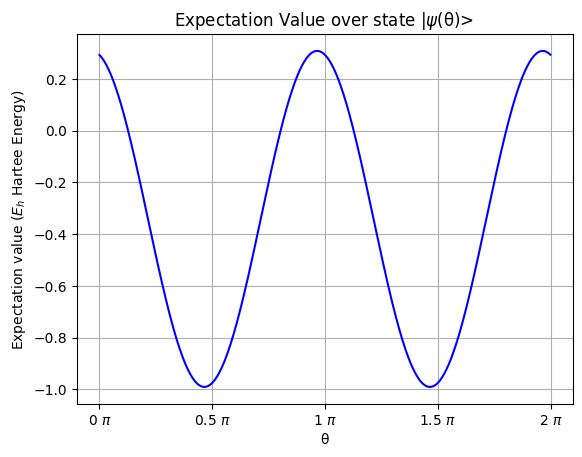

In [10]:
def wavefunction(theta):
    return np.array([0, 0, 0, np.cos(theta), 0, 0, 0, 0, 0, 0, 0, 0, -np.sin(theta), 0, 0, 0])

x = np.arange(0, 2*np.pi, 0.01)

y_values = []

for i in x:
    y_values.append(expectation_from_decomp_4qubit(ham_tot_pauli_decomp, wavefunction(i)).real)

plt.plot(x/np.pi, y_values, color='blue')

plt.xlabel('θ')
plt.ylabel('Expectation value ($E_h$ Hartee Energy)')
plt.title('Expectation Value over state $|\psi$(θ)> ')

plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.gca().xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

plt.grid()
plt.show()


In [11]:
min_y = min(y_values)

print(f"The minimum y value is: {min_y:.2f}")

The minimum y value is: -0.99


In [12]:
print(S_gate)

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
